This notebook contains the analysis of Bias correction with our own data.

How to manage to have pred as dataframe and not array ?

In [36]:
# import modules and functions

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# import data
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6
from Functions_ImportData import import_treat_obs_NOAA
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA
from Bias_correction_function import BC
from Bias_correction_function import treat_data_for_test

In [2]:
# import observation data
data_obs_NOAA=import_treat_obs_NOAA()

In [3]:
name_model = 'ACCESS-CM2'

In [4]:
# precipitation

In [5]:
climate_var = 'pr' # 'tas'

# precipitation : 'pr'

name_station = 'BEIRA, MZ'
name_project = 'WTP_Mutua_EIB'

In [6]:
climate_var_NEX_GDDP_CMIP6_Project=import_treat_modeled_NEX_GDDP_CMIP6(climate_var,'mm_per_day','day',1950,2100)

In [7]:
climate_var_NEX_GDDP_CMIP6_EmplacementStation=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, 'mm_per_day')

In [8]:
df_pr = treat_data_for_test(data_obs_NOAA,'PRCP',climate_var_NEX_GDDP_CMIP6_EmplacementStation,'Mean of the daily precipitation rate mm/day','BEIRA, MZ',name_model)

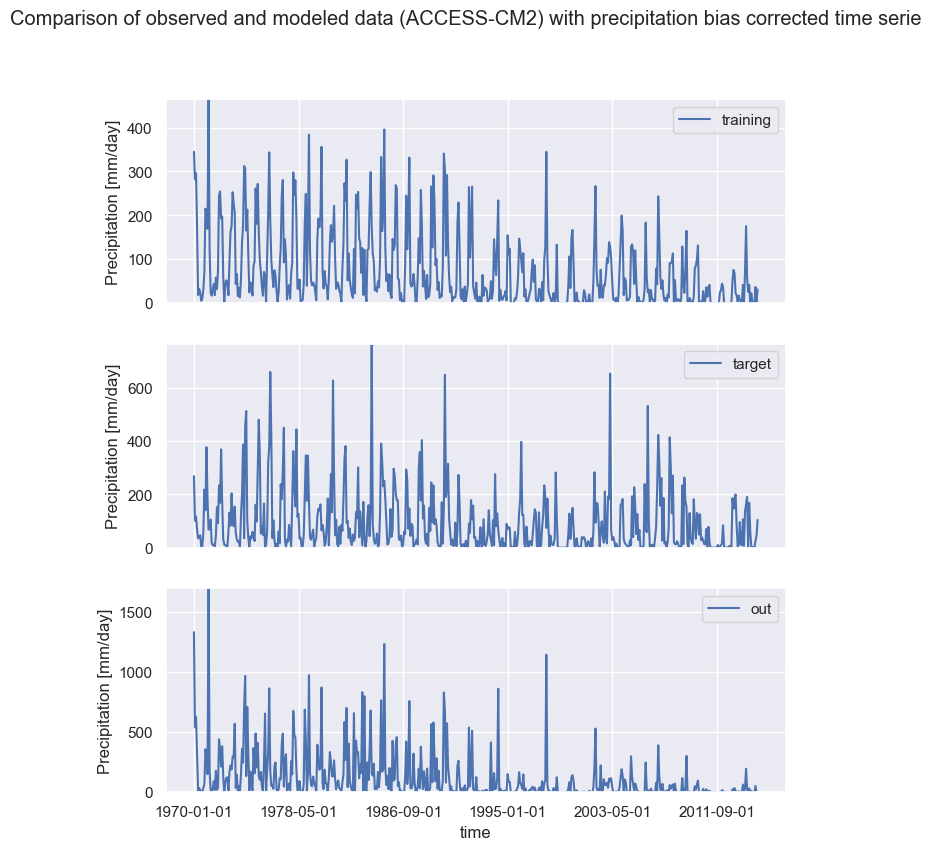

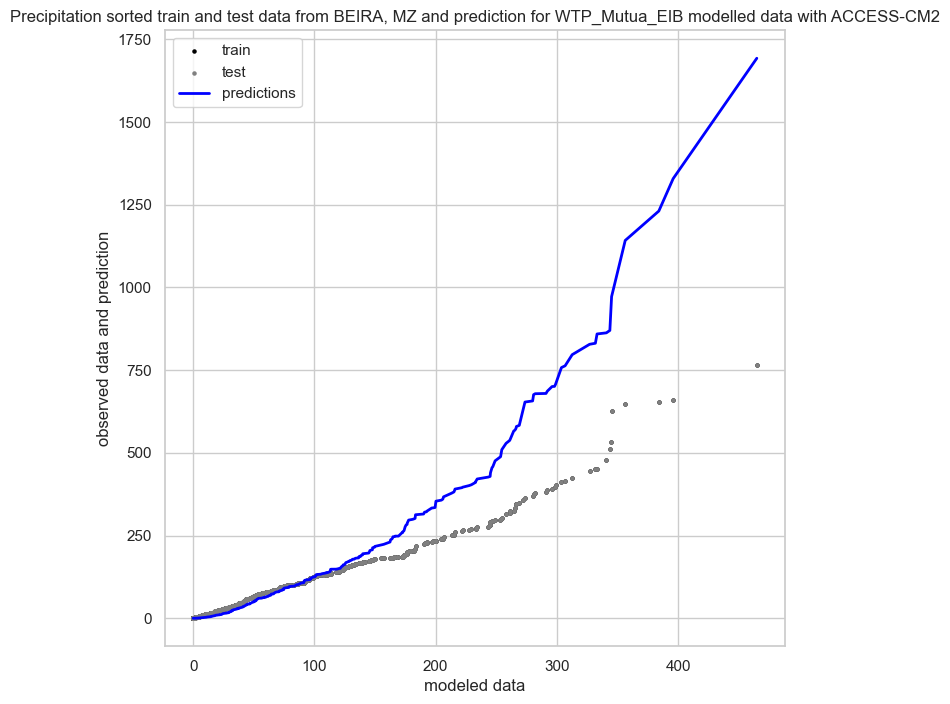

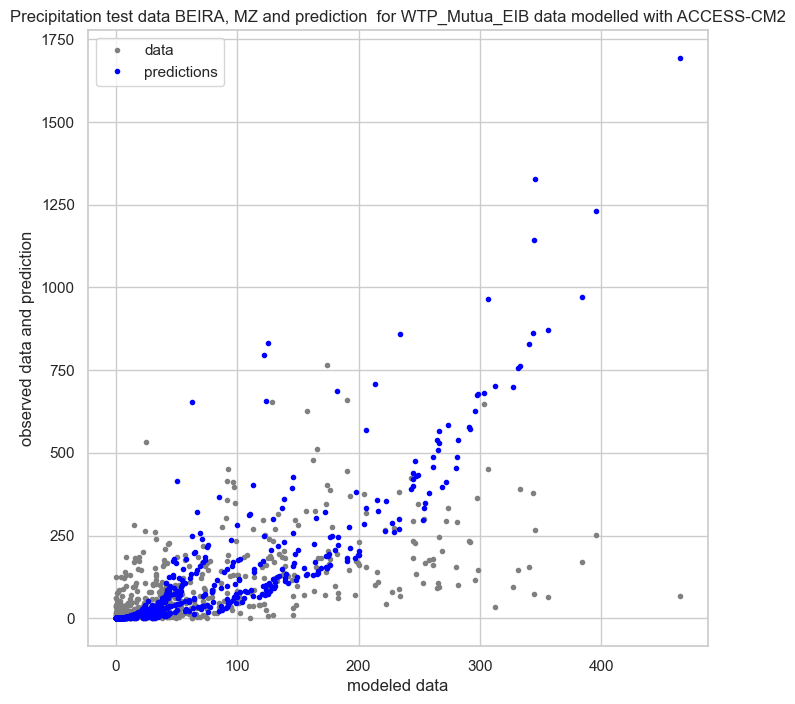

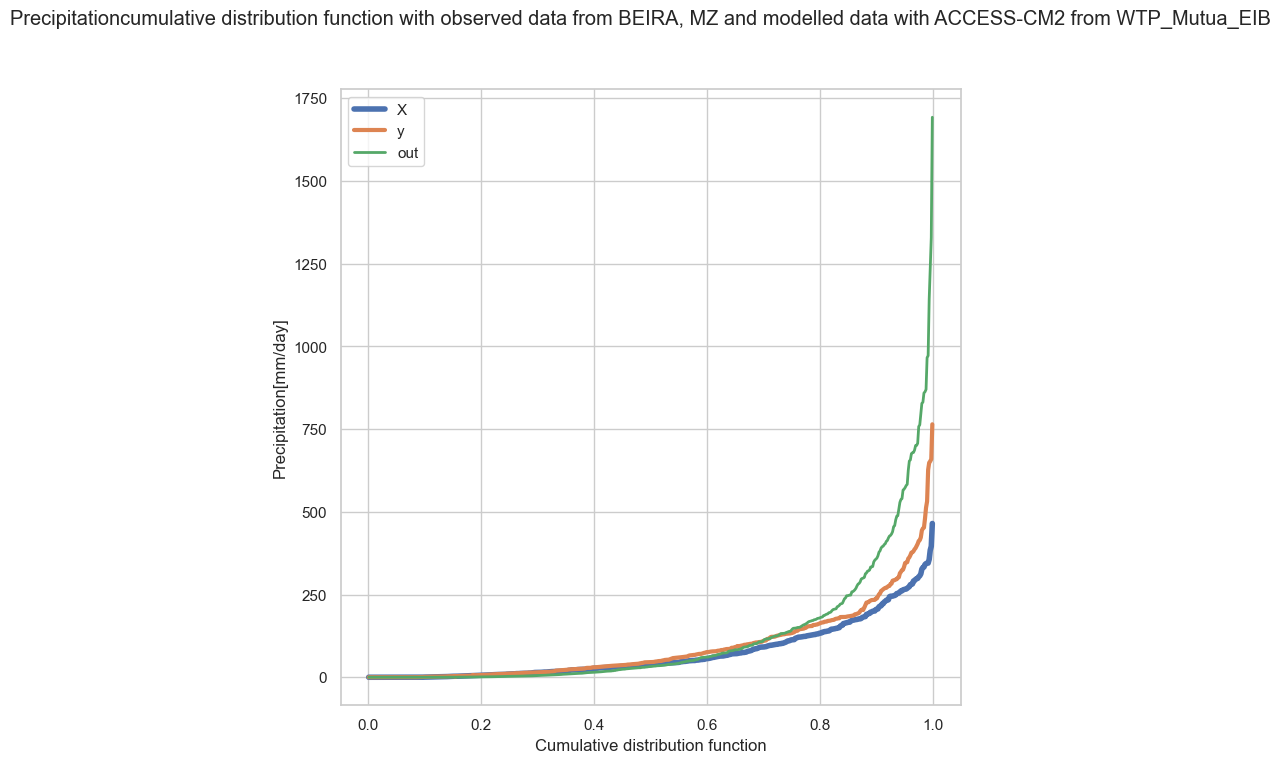

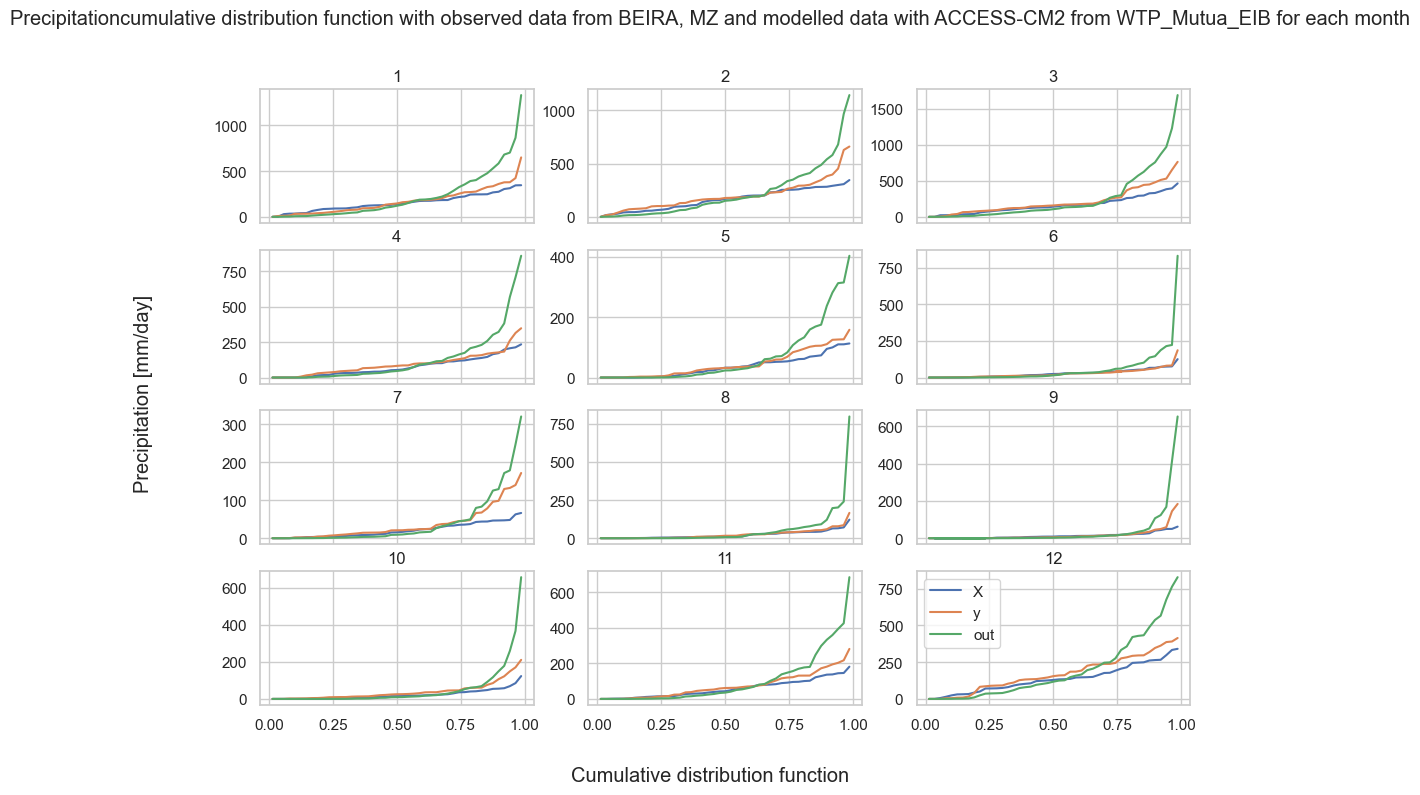

In [9]:
(pred)=BC(df_pr,'pcp','Bcsd_Precipitation',name_station,name_project,name_model)# results with resample by month
#(pr_pred_bcsd_temp)=BC(df_pr,'pcp','Bcsd_Precipitation',name_station,name_project,name_model)# results with resample by month

In [ ]:
df_pr

In [ ]:
df_pr[[('training','pcp')]][min(df_pr.index)[0:4]: max(df_pr.index)[0:4]]

In [13]:
from mlinsights.mlmodel import PiecewiseRegressor # in piecewise estimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

X = df_pr[[('training','pcp')]][min(df_pr.index)[0:4]: max(df_pr.index)[0:4]]#.values#training[[name_col]]['1980': '2000'].values
X.columns = X.columns.droplevel()
y = df_pr[[('targets','pcp')]][min(df_pr.index)[0:4]: max(df_pr.index)[0:4]]#.values#targets[[name_col]]['1980': '2000'].values
y.columns = y.columns.droplevel()

X_train, X_test, y_train, y_test = train_test_split(X, y)# splits data
#X_train.columns = X_train.columns.droplevel()
#X_train

In [14]:
X_train

,pcp
time,
1980-05-26,6.403909
1981-06-25,0.000000
1983-02-19,6.911122
1990-03-26,0.000000
1979-09-02,0.000000
...,...
2004-11-18,1.628975
1996-03-24,1.027345
1996-02-19,0.000000


In [ ]:
X_train.reset_index()

In [ ]:
X_train=X_train.reset_index()#.set_index('time')

In [ ]:
X_train.columns

In [ ]:
y_train.columns = y_train.columns.droplevel()
X_test.columns = X_test.columns.droplevel()
y_test.columns = y_test.columns.droplevel()

In [ ]:
y_train=y_train.reset_index()#.set_index('time')
X_test=X_test.reset_index()#.set_index('time')
y_test=y_test.reset_index()#.set_index('time')

In [37]:
model = PiecewiseRegressor(binner=KBinsDiscretizer(n_bins=7, strategy='kmeans'))
model.fit(X_train, y_train)
pred = model.predict(X_test)

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

In [16]:
X_test.ndim

2

In [18]:
X_test2=X_test.reset_index().drop('time',axis=1)

In [19]:
X_test2.ndim

2

In [20]:
X_test2

,pcp
0,0.000000
1,4.099012
2,0.000000
3,11.026712
4,0.000000
...,...
2561,0.938106
2562,0.000000
2563,0.000000
2564,2.669762


In [ ]:
X_test.values.reshape((len(X_test),))

In [ ]:
X_train.shape

In [27]:
from mlinsights.mlmodel import QuantileLinearRegression # in quantile_regression

X = df_pr[[('training','pcp')]][min(df_pr.index)[0:4]: max(df_pr.index)[0:4]]#.values#training[[name_col]]['1980': '2000'].values
X.columns = X.columns.droplevel()
y = df_pr[[('targets','pcp')]][min(df_pr.index)[0:4]: max(df_pr.index)[0:4]]#.values#targets[[name_col]]['1980': '2000'].values
y.columns = y.columns.droplevel()

X_train, X_test, y_train, y_test = train_test_split(X, y)# splits data


model = QuantileLinearRegression()

model.fit(X_train, y_train.values.reshape((len(y_train),))) # si on ne met pas array, 
# ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2

#if name_col=='pcp':
   # pred = model.predict(X_test.reshape((len(X_test),1)))*X_test.reshape((len(X_test),))
#if 'temp' in name_col.lower():
    #pred = model.predict(X_test.reshape((len(X_test),1)))+X_test.reshape((len(X_test),))
#if name_col!='pcp' and 'temp' not in name_col.lower():
#else:
pred = model.predict(X_test)

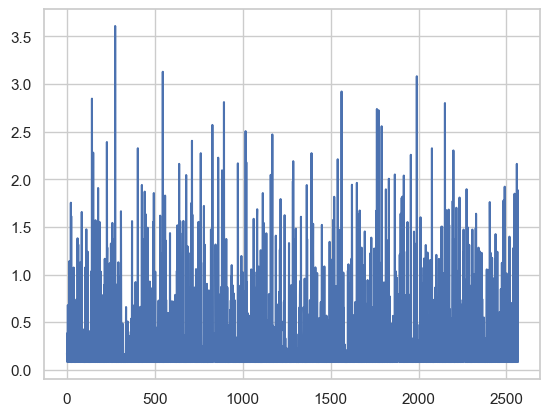

In [38]:
plt.plot(pred)

In [26]:
y_train.values.reshape((len(y_train),))

array([0., 1., 0., ..., 0., 0., 0.])

In [39]:
from mlinsights.mlmodel import QuantileMLPRegressor # in qunatile_mlpregressor

X_train, X_test, y_train, y_test = train_test_split(X, y)# splits data

model = QuantileMLPRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('mean absolute error')
print(model.score(X_test, y_test)) # mean absolute error

mean absolute error
4.913555299599548


In [40]:
pred

array([ 0.01850807,  0.00731214, -0.00103145, ..., -0.00234237,
       -0.00261784, -0.00103145])

In [41]:
X_train

,pcp
time,
1971-04-22,12.666528
2008-06-29,0.000000
1987-04-07,5.026582
1981-07-18,0.000000
1981-05-17,0.000000
...,...
1971-08-30,0.000000
1985-02-27,2.685687
1980-08-05,0.000000


In [ ]:
(pr_pred_q_lin)=BC(df_pr,'pcp','Quantile_Linear_Regression',name_station,name_project,name_model)

In [ ]:
(pr_pred_q_mlpr)=BC(df_pr,'pcp','Quantile_MLP_Regressor',name_station,name_project,name_model)

In [ ]:
(pr_pred_p_reg)=BC(df_pr,'pcp','piecewise_regressor',name_station,name_project,name_model)

In [ ]:
# temperature

In [ ]:
climate_var = 'tas'

# precipitation : 'pr'
# temperature : 'tas'
# maximum temperature : tasmax
# minimum temperature : tasmin

name_station = 'BEIRA, MZ'
name_project = 'WTP_Mutua_EIB'

In [ ]:
climate_var_NEX_GDDP_CMIP6_EmplacementStation_tas=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, 'Celsius')

In [ ]:
df_tas = treat_data_for_test(data_obs_NOAA,'TAVG',climate_var_NEX_GDDP_CMIP6_EmplacementStation_tas,'Daily Near-Surface Air Temperature °C','BEIRA, MZ',name_model)

In [ ]:
(tas_pred_bcsd_temp)=BC(df_tas,'temp','Bcsd_Temperature',name_station,name_project,name_model)# results without resample by month

In [ ]:
(tas_pred_q_lin)=BC(df_tas,'temp','Quantile_Linear_Regression',name_station,name_project,name_model)

In [ ]:
(tas_pred_p_reg)=BC(df_tas,'temp','piecewise_regressor',name_station,name_project,name_model)

In [ ]:
# maximum temperature

In [ ]:
climate_var = 'tasmax'

# precipitation : 'pr'
# temperature : 'tas'
# maximum temperature : tasmax
# minimum temperature : tasmin

name_station = 'BEIRA, MZ'
name_project = 'WTP_Mutua_EIB'

In [ ]:
climate_var_NEX_GDDP_CMIP6_EmplacementStation_tasmax=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, 'Celsius')
df_tasmax = treat_data_for_test(data_obs_NOAA,'TMAX',climate_var_NEX_GDDP_CMIP6_EmplacementStation_tasmax,'Daily Maximum Near-Surface Air Temperature °C','BEIRA, MZ',name_model)

In [ ]:
(tasmax_pred_bcsd_temp)=BC(df_tasmax,'temp_max','Bcsd_Temperature',name_station,name_project,name_model)# results without resample by month

In [ ]:
(tasmax_pred_q_lin)=BC(df_tasmax,'temp_max','Quantile_Linear_Regression',name_station,name_project,name_model)

In [ ]:
(tasmax_pred_p_reg)=BC(df_tasmax,'temp_max','piecewise_regressor',name_station,name_project,name_model)